# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [7]:
import pandas as pd
import numpy as np

df=pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
df = df.dropna(subset=['CustomerID'])


In [15]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]


In [16]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [17]:
df = df.drop_duplicates()


In [18]:
df.shape

(392692, 8)

In [19]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [22]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [23]:

stats_summary = df[['Quantity', 'UnitPrice', 'TotalPrice']].describe()
print(stats_summary)


            Quantity      UnitPrice     TotalPrice
count  392692.000000  392692.000000  392692.000000
mean       13.119702       3.125914      22.631500
std       180.492832      22.241836     311.099224
min         1.000000       0.001000       0.001000
25%         2.000000       1.250000       4.950000
50%         6.000000       1.950000      12.450000
75%        12.000000       3.750000      19.800000
max     80995.000000    8142.750000  168469.600000


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns



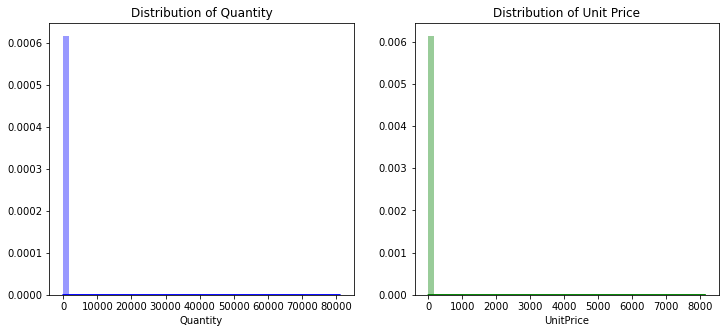

In [26]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['Quantity'], bins=50, kde=True, color='blue')
plt.title('Distribution of Quantity')

plt.subplot(1, 2, 2)
sns.distplot(df['UnitPrice'], bins=50, kde=True, color='green')
plt.title('Distribution of Unit Price')

plt.show()


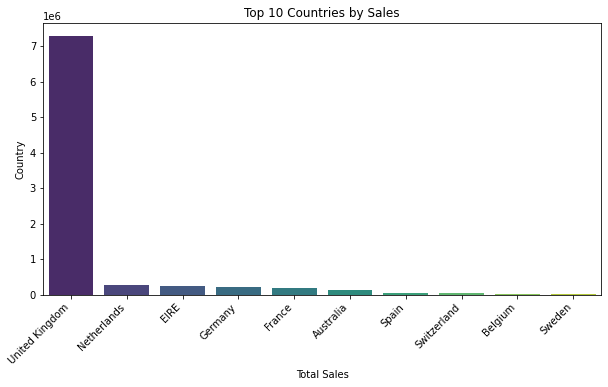

In [39]:

country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country_sales.index, y=country_sales.values, palette='viridis')
plt.title('Top 10 Countries by Sales')
plt.xlabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Country')
plt.show()


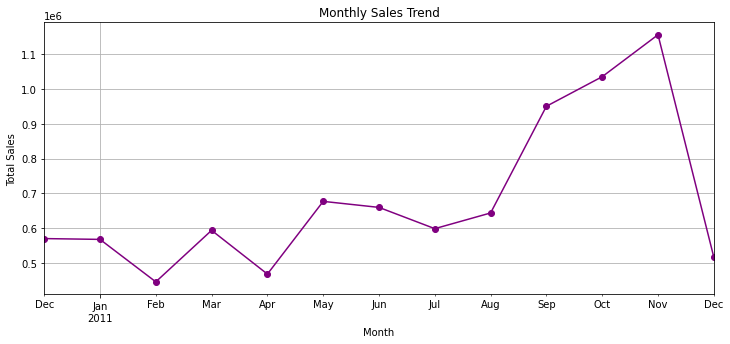

In [38]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum()

plt.figure(figsize=(12,5))
monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')

plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


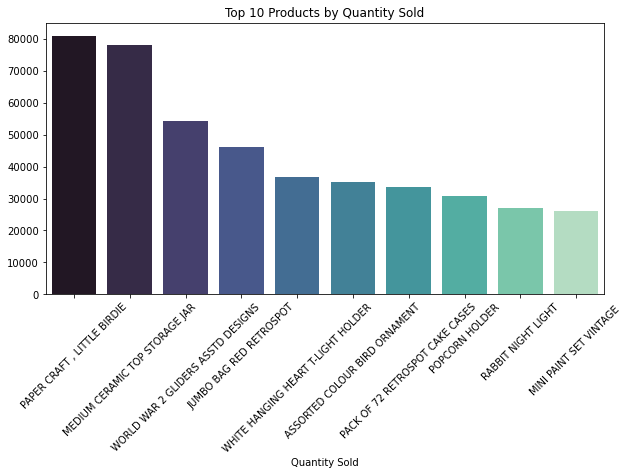

In [36]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.index, y=top_products.values, palette='mako')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()


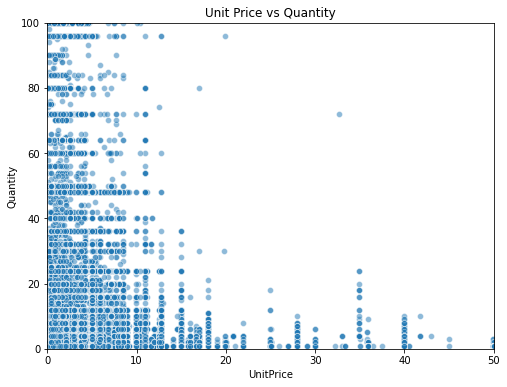

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='UnitPrice', y='Quantity', data=df, alpha=0.5)
plt.title('Unit Price vs Quantity')
plt.xlim(0, 50)  # Limit to remove outliers for clarity
plt.ylim(0, 100)
plt.show()


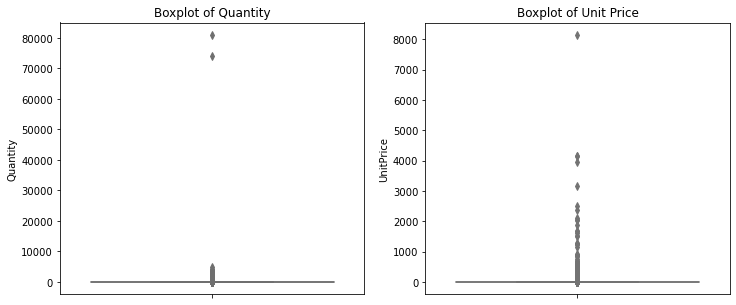

In [41]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Quantity'], color='skyblue')
plt.title('Boxplot of Quantity')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['UnitPrice'], color='lightgreen')
plt.title('Boxplot of Unit Price')

plt.show()


In [42]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df['Weekday'] = df['InvoiceDate'].dt.day_name()


In [43]:
monthly_sales = df.groupby(['Year','Month'])['TotalPrice'].sum().reset_index()

monthly_sales['YearMonth'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str).str.zfill(2)

monthly_sales = monthly_sales.sort_values(['Year','Month'])


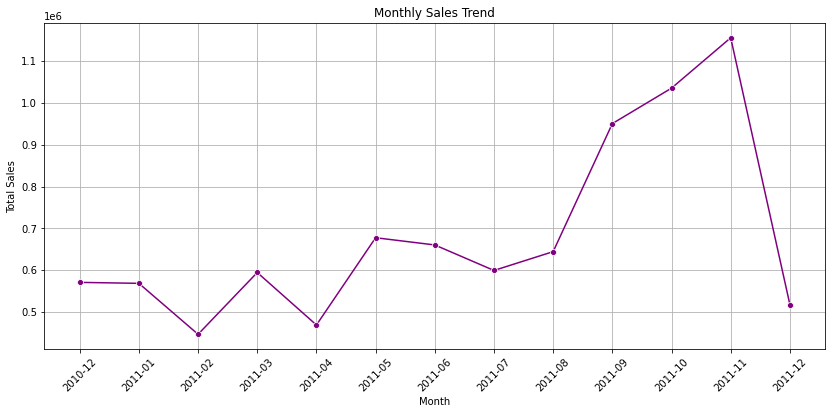

In [44]:


plt.figure(figsize=(14,6))
sns.lineplot(x='YearMonth', y='TotalPrice', data=monthly_sales, marker='o', color='purple')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


In [45]:
weekday_sales = df.groupby('Weekday')['TotalPrice'].sum().reset_index()


weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_sales['Weekday'] = pd.Categorical(weekday_sales['Weekday'], categories=weekday_order, ordered=True)
weekday_sales = weekday_sales.sort_values('Weekday')


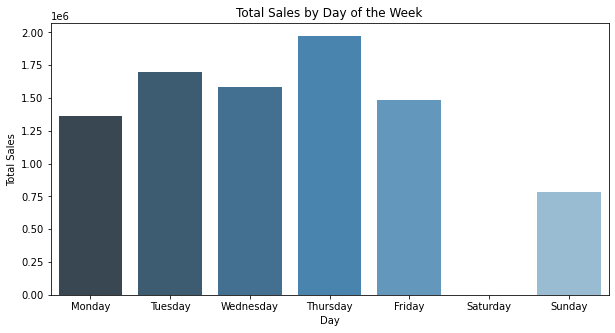

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(x='Weekday', y='TotalPrice', data=weekday_sales, palette='Blues_d')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.show()


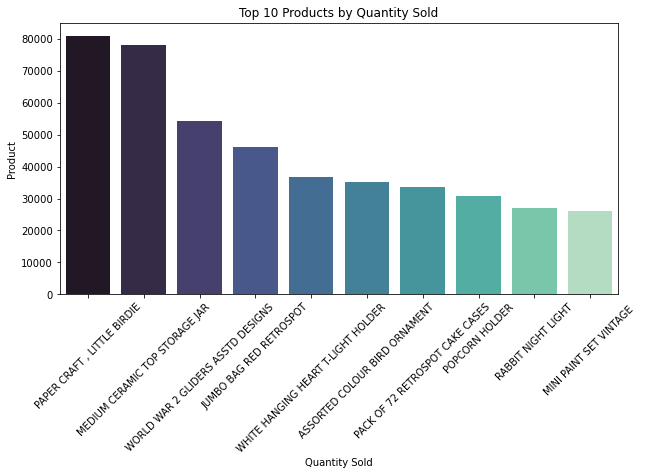

Top 10 Products:
Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


In [48]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.index, y=top_products.values, palette='mako')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.xticks(rotation=45)
plt.ylabel('Product')
plt.show()

print("Top 10 Products:")
print(top_products)


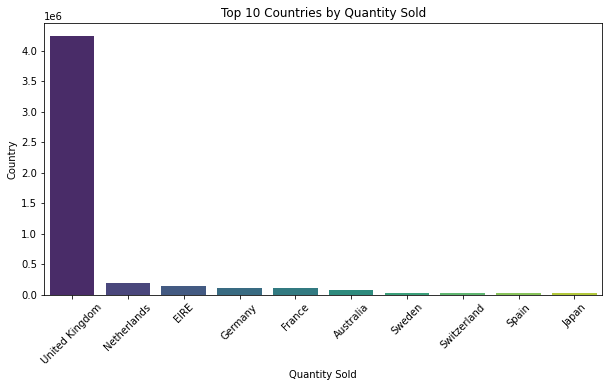

Top 10 Countries:
Country
United Kingdom    4241305
Netherlands        200361
EIRE               140133
Germany            119154
France             111428
Australia           83891
Sweden              36078
Switzerland         30082
Spain               27933
Japan               26016
Name: Quantity, dtype: int64


In [50]:
top_countries = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Countries by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.xticks(rotation=45)
plt.ylabel('Country')
plt.show()

print("Top 10 Countries:")
print(top_countries)


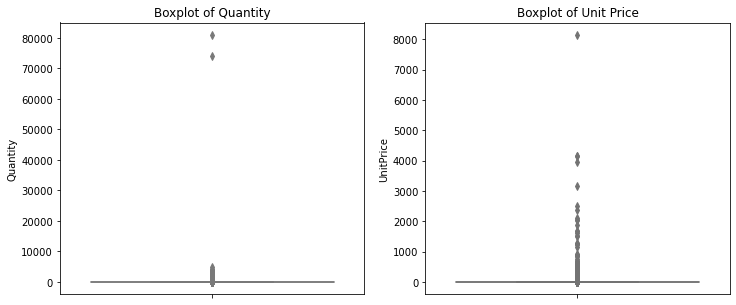

In [51]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Quantity'], color='lightblue')
plt.title('Boxplot of Quantity')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['UnitPrice'], color='lightgreen')
plt.title('Boxplot of Unit Price')

plt.show()


In [52]:
print("Max Quantity:", df['Quantity'].max())
print("Max UnitPrice:", df['UnitPrice'].max())
print(df[df['Quantity'] > 10000])  
print(df[df['UnitPrice'] > 1000])  


Max Quantity: 80995
Max UnitPrice: 8142.75
       InvoiceNo StockCode                     Description  Quantity  \
61619     541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
540421    581483     23843     PAPER CRAFT , LITTLE BIRDIE     80995   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
61619  2011-01-18 10:01:00       1.04     12346.0  United Kingdom     77183.6   
540421 2011-12-09 09:15:00       2.08     16446.0  United Kingdom    168469.6   

       InvoiceMonth  Month  Year  Weekday  
61619       2011-01      1  2011  Tuesday  
540421      2011-12     12  2011   Friday  
       InvoiceNo StockCode     Description  Quantity         InvoiceDate  \
117054    546328         M          Manual         1 2011-03-11 10:19:00   
117055    546329         M          Manual         1 2011-03-11 10:22:00   
144826    548813         M          Manual         1 2011-04-04 13:03:00   
144828    548813         M          Manual         1 2011-04

In [53]:
# summary

# Findings:
    
# 1.Sales Trends

# -Peak sales occur in November and December
# -Lowest sales in summer months.

# 2.Busiest Days

# -Thursdays and Tuesdays are busiest 
# -Weekends have fewer transactions.

# 3.Top Countries

# -United Kingdom contributes the majority of sales.
# -Other significant markets: Netherlands, EIRE (Ireland), Germany, France.

# 4.Top Products

# -Best-selling products are decorative household items, often low-price high-volume items.
# -Customer Behavior
# -Most orders are small quantities (median = 3), but outliers exist (up to 80,995 units in one invoice).

# 5.Outliers

# -Extreme values in Quantity and UnitPrice exist and must be handled.
# -Some transactions have negative quantities (returns) or prices.

# Actionable Insights:
# -Inventory planning: Increase stock for top products during Nov-Dec.
# -Pricing strategy: Outliers in price may indicate incorrect data or premium products; investigate.
# -Data quality: Remove or adjust anomalies for accurate financial reporting.
# -Customer segmentation: Focus on the UK market but explore growth in EU countries.

